<a href="https://colab.research.google.com/github/AJ-King-5153/ai-reversi/blob/main/AJ_King_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


This subscription based business model is used all over the world in industries such as streaming services, telecom, and various online memberships. Customer retention in those kinds of industries is very important because, typically keeping returning customers is easier in the industry than getting new ones. The main problem in this case is customer churn (when a customer cancels their service). When a customer cancels their subscription, the company loses revenue. The problem can be partially "solved" with predictions made by machine learning. A model such as this could provide savings by reducing unnecessary marketing on customers who are unlikely to leave. It can increase revenue by personally marketing to customers with a higher churn rate. This could help make better business decisions in general and potentially improve customer satisfaction by providing more personalized engagement. The company gains financial stability. The customers receive more personalized service, and employees can better allocate their marketing resources rather than creating big campaigns for no reason. Using classification models for churning could be optimal as it would predict if the customer will churn (Yes or No). Specifically, Logistic Regression or another such as Random Forest may prove superior. Regression models may be useful for predicting when this may occur (a model good with time). Also, clustering could prove rather useful for understanding different types of churners. Some challenges in creating this model may include Data quality related issues like incomplete customer data (purchase history, watch time, etc) can prove difficult for the model. The model may struggle with overfitting if there are too many features present. Otherwise, bias could be present if too much of one demographic is in the data. To deploy a model like this, the business would need results that provide clear enough insight to take action on. All in all, if implemented properly, a model such as this is a high impact business idea that can help industries reduce revenue loss and improve customer retention.



In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set the path to the file you'd like to load
file_path = "netflix_users.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "smayanj/netflix-users-database",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-1-cb1b9fe5accc>:21: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login  
0          Drama  2024-05-12  
1         Sci-Fi  2025-02-05  
2         Comedy  2025-01-24  
3    Documentary  2024-03-25  
4          Drama  2025-01-14  


In [ ]:
# Exploratory Data Analysis (Summary)

# Data cleaning
df.isna().sum()
# show null values, in our case there's none

# Summary Stats
print("Average age:", df['Age'].mean(), "\nStandard deviation of overall watchtime:", df['Watch_Time_Hours'].std())
print("Average Reigon: ", df['Country'].value_counts().idxmax(), "\nAverage Subscription Type: ", df['Subscription_Type'].value_counts().idxmax())
print("Average Genre: ", df['Favorite_Genre'].value_counts().idxmax())
print("Average Last Login: ", df['Last_Login'].value_counts().idxmax())
print("Some more general statistics including std down below: \n")
df.describe()


Average age: 46.48288 
Standard deviation of overall watchtime: 286.38181524853906
Average Reigon:  UK 
Average Subscription Type:  Premium
Average Genre:  Horror
Average Last Login:  2024-09-05
Some more general statistics including std down below: 



,User_ID,Age,Watch_Time_Hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000


 # Exploratory Data Analysis

 Here is a link to the dataset to be experimented on: https://www.kaggle.com/datasets/smayanj/netflix-users-database?resource=download

## Data Description

This dataset was found on Kaggle. Its a synthetic but realistic collection designed for analysis and ML practice. It contains 25,000 fictional Netflix user records. It has various attributes related to user demographics and commmon behaviors. Some of the rather important column and data types include:

1.   User_id: int
2.   Name: string
3.   Age: int
4.   Country: string
5.   Subscription_type: string
6.   Watch_time: float
7.   Favorite_genre: string
8.   Last_login: date

## Exploratory Analysis

Some data cleaning steps may need to be taken in order to get better results. For example, we may need to check for any null or missing values across the columns. If they are found, then consider importing the values with the average for their demographic or sample average depending on whats not there. In this case, there isnt any missing data. For outliers, it might be best to ensure all values are possible. Making an age range with something like 13-80 may be beneficial. Or watch time thats impossibly high may need some cleaning. Some data formatting may be required such as converting last login to a more standard date time format. Its important to provide a statistics summary to have a basis. The most common age is 46, but it seems as though there are lots of users across all ages. The most common reigons are UK, USA, Germany. For subscription type the most common is Premiuim at 34% users and Basic at 33% users and its shown within the graph that subscription type doesnt correlate to watch time. The last login is anywhere from march of 2024 to march of 2025. This is a good time range because anyone that hasnt watched since march 24' might have forgotten they were subscribed but are still paying for the service. The most common Genre favorites include Horror and Documentary, closley followed by Drama and Comedy which makes sense for the most part.It's neccasary to put a heavier weight on age, last login, and watch time when detecting how to determine churn rate for the linear regression model. If there was another model, considering all of the columns for customer segmentation may be more wise. With the data below as well I believe I could create a realistic churning predictor if I found more correlations.








<Axes: xlabel='Last_Login', ylabel='Count'>

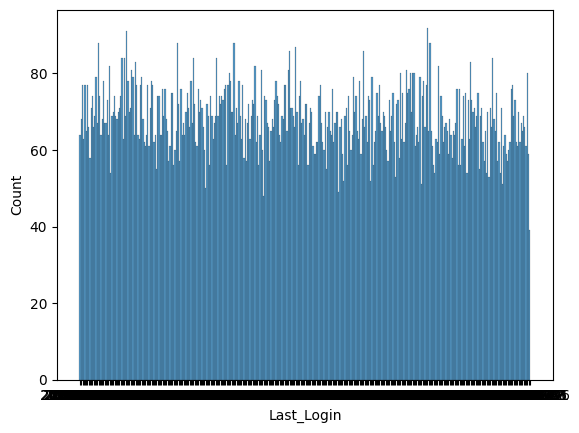

In [ ]:
# Exploratory Data Analysis (Visualizations)

sns.histplot(df['Last_Login'])

<Axes: xlabel='Subscription_Type', ylabel='Watch_Time_Hours'>

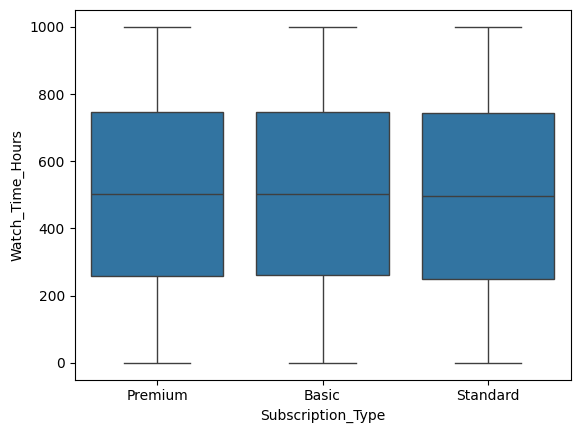

In [ ]:
# Exploratory Data Analysis (Visualizations)

sns.boxplot(x='Subscription_Type', y='Watch_Time_Hours', data=df)

<Axes: xlabel='Favorite_Genre', ylabel='Count'>

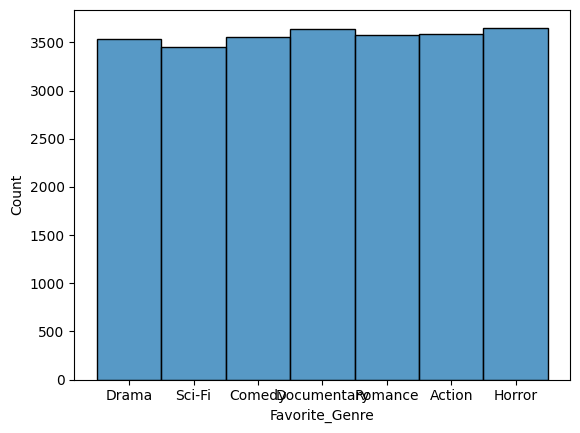

In [ ]:
# Exploratory Data Analysis (Visualizations)

sns.histplot(df['Favorite_Genre'])

In [ ]:
# Correlation + Hypothesis testing

# Do older users spend more?
df['Subscription_Type_Num'] = df['Subscription_Type'].map({'Basic': 0, 'Premium': 1})
df[['Age', 'Subscription_Type_Num']].corr()
# basically no correlation between age and subscription type

,Age,Subscription_Type_Num
Age,1.000000,0.005324
Subscription_Type_Num,0.005324,1.000000


In [ ]:
# Correlation + Hypothesis testing

# How well do last login and watch time correlate?
# Format last login to a date time then convert to an int by days
df['Last_Login'] = pd.to_datetime(df['Last_Login'])
today = pd.Timestamp.today()
df['Days_Since_Login'] = (today - df['Last_Login']).dt.days
df[['Days_Since_Login', 'Watch_Time_Hours']].corr()
# This means there is a slight correlation meaning those who have logged on recently may
# have more watch time but its so small its meaningless which is very surprising. This may be different
# with a real data set, but it might still be possible to get something out of this data.

,Days_Since_Login,Watch_Time_Hours
Days_Since_Login,1.000000,-0.008463
Watch_Time_Hours,-0.008463,1.000000


In [ ]:
# Correlation + Hypothesis testing
# pairwise t-tests for all Favorite genre combos

genres = df['Favorite_Genre'].dropna().unique()

for i in range(len(genres)):
    for j in range(i+1, len(genres)):
        g1 = genres[i]
        g2 = genres[j]
        group1 = df[df['Favorite_Genre'] == g1]['Watch_Time_Hours']
        group2 = df[df['Favorite_Genre'] == g2]['Watch_Time_Hours']
        stat, pval = ttest_ind(group1, group2, nan_policy='omit')
        print(f"{g1} vs {g2}: t={stat:.3f}, p={pval:.4f}")

# no p-val fell below 0.05 however 0.1293 for sci fi and romance which is very interesting
# and not what I would have guessed at all. This could have been useful as we can use correlations like this as predictors and find churn rates off of watch time and a genre
# combo if they correlate well enough.

Drama vs Sci-Fi: t=1.194, p=0.2327
Drama vs Comedy: t=0.386, p=0.6994
Drama vs Documentary: t=0.562, p=0.5743
Drama vs Romance: t=-0.357, p=0.7214
Drama vs Action: t=0.886, p=0.3757
Drama vs Horror: t=1.483, p=0.1381
Sci-Fi vs Comedy: t=-0.804, p=0.4213
Sci-Fi vs Documentary: t=-0.635, p=0.5257
Sci-Fi vs Romance: t=-1.539, p=0.1239
Sci-Fi vs Action: t=-0.310, p=0.7562
Sci-Fi vs Horror: t=0.275, p=0.7835
Comedy vs Documentary: t=0.173, p=0.8625
Comedy vs Romance: t=-0.738, p=0.4603
Comedy vs Action: t=0.497, p=0.6195
Comedy vs Horror: t=1.089, p=0.2763
Documentary vs Romance: t=-0.914, p=0.3606
Documentary vs Action: t=0.325, p=0.7451
Documentary vs Horror: t=0.918, p=0.3584
Romance vs Action: t=1.235, p=0.2167
Romance vs Horror: t=1.831, p=0.0671
Action vs Horror: t=0.590, p=0.5553


In [ ]:
# Correlation + Hypothesis testing
df['Last_Login'] = pd.to_datetime(df['Last_Login'])
churn_threshold = pd.Timedelta(days=90)
today = pd.to_datetime("today")
df['Churn'] = (today - df['Last_Login']) > churn_threshold
df['Churn'] = df['Churn'].astype(int)
print(df['Churn'].value_counts())

# this may show those not logged on in the past 90 days are more than likley going to cancel,
# this may be with the synthetic data being more randomized. But synthetic is just fine knowing
# there would be stronger relationships on actual customer data. It might be more beneficial to pivot to customer segmentation for targeted marketing instead of a churn rate model.

Churn
1    22555
0     2445
Name: count, dtype: int64


In [ ]:
# drop irrelevant columns in preperation of model

df = df.drop(['User_ID', 'Name', 'Last_Login'], axis=1)

# Model Selection

## Feature Engineering & Selection
A few steps were taken to prepare the raw df for segmentation. First, a new feature called Days_Since_Login was created from the original Last_Login column by calculating the number of days since each user last logged in. This was a valuable step  which is commonly used in customer analytics to display engagement or potential churn risk. Irrelevant columns like User_ID, Name, and the original Last_Login date were dropped, as they don’t contribute meaningfully enough.

For feature selection, filter methods were used to choose relevant numerical features like days since login, Age, and Watch Time, I tried using those that reflect user behabior and had the best test scores. These features were standardized and then reduced using PCA to simplify the dataset. I then selected catagorical based on those that showed customer type or revenue (Subscription Type).

## Model Tuning, Validation, and Evaluation

I used K Means Clustering because it’s a simple and effective way to group similar users without needing any labeled data. Since this is an unsupervised learning problem, I didn’t use models like decision trees or logistic regression. I would have gone a logistic regression route in order to find a churn rate but maybe that's how this model can be improved. To check how good the clusters were, I performed a Silhouette Score test, which tells us how well each user fits into their cluster. The score was a bit low ~0.15, which could mean the users aren’t very different from each other, but we still chose K Means because it’s easy to understand and works well for finding general patterns. On top of that, the results of this model can still be used when finding what ad to send to what user.







In [ ]:
# defining features
numerical = ['Age', 'Watch_Time_Hours', 'Days_Since_Login']
categorical = ['Country', 'Favorite_Genre']

# pre process
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# k-means
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

In [ ]:
# fit the model
kmeans_pipeline.fit(df)
df['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# need to transform pca for 2d
features_transformed = preprocessor.fit_transform(df.drop('Cluster', axis=1))
pca = PCA(n_components=2)
components = pca.fit_transform(features_transformed)

df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

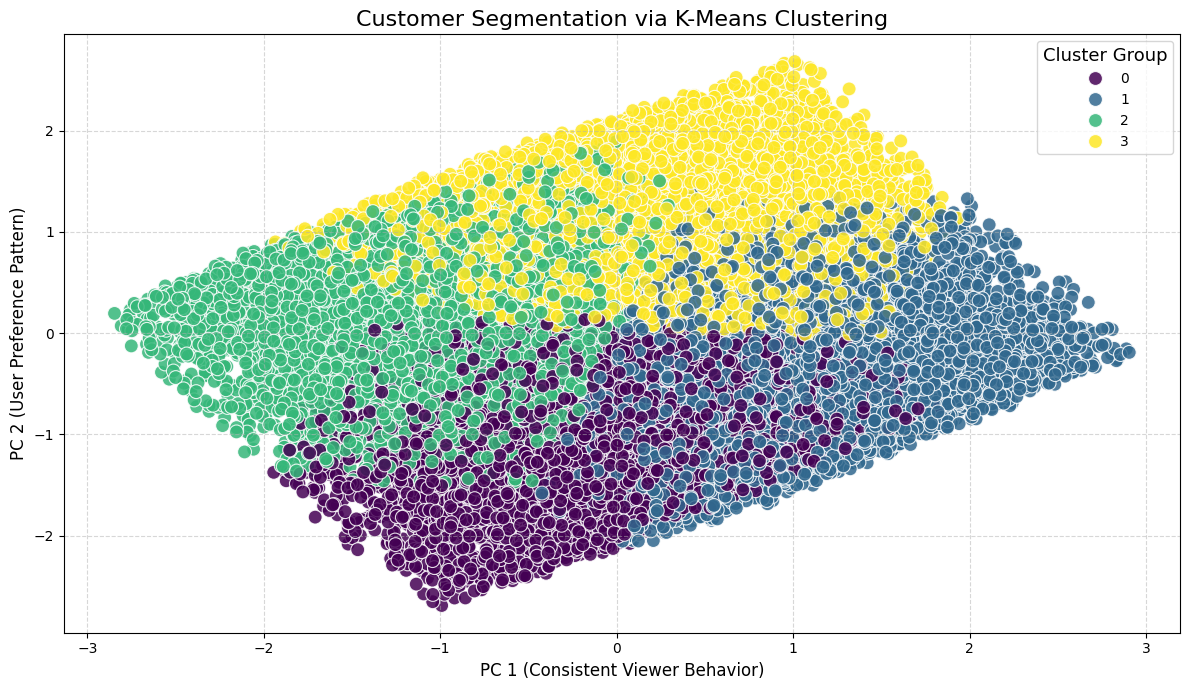

In [ ]:
# display
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.85,
    edgecolor='white'
)
plt.title('Customer Segmentation via K-Means Clustering', fontsize=16)
plt.xlabel('PC 1 (Consistent Viewer Behavior)', fontsize=12)
plt.ylabel('PC 2 (User Preference Pattern)', fontsize=12)
plt.legend(title='Cluster Group', title_fontsize='13', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
score = silhouette_score(features_transformed, df['Cluster'])
print(f'Silhouette Score: {score:.3f}')

# this silhouette score is pretty bad and the lack of seperation between the clusters is also misleading. I do believe this is a data set issue
# To be sure, Ill use the same model on a similar user dataset

Silhouette Score: 0.146


In [ ]:
# Download latest version
path = kagglehub.dataset_download("egedsonemmanuel/netflix-user-data")

print("Netflix Userbase.csv", path)
df2 = pd.read_csv(path + "/Netflix Userbase.csv")
df2.head()

100%|██████████| 29.6k/29.6k [00:00<00:00, 35.4MB/s]

Extracting files...
Netflix Userbase.csv /root/.cache/kagglehub/datasets/egedsonemmanuel/netflix-user-data/versions/1


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10/6/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,15-01-23,10/7/2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,15-01-24,10/8/2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,15-01-25,10/9/2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,15-01-26,10/10/2023,Germany,33,Male,Smartphone,1 Month


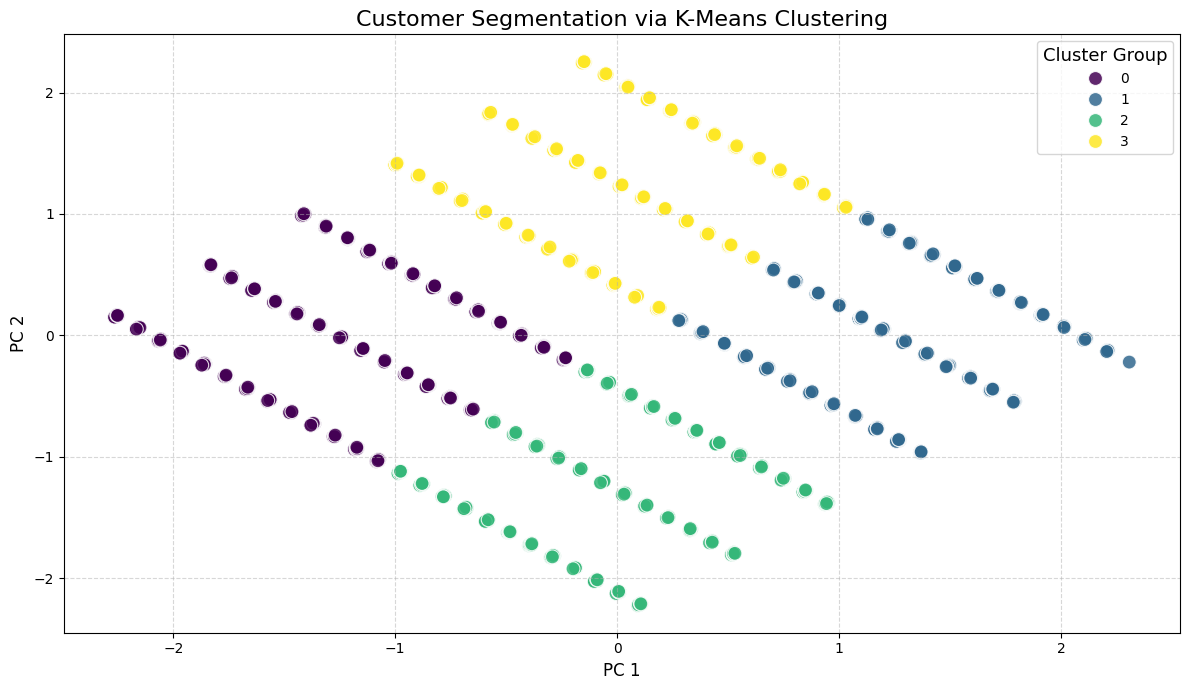

Silhouette Score: 0.235
Davies Bouldin Index: 1.307


In [ ]:
# defining features
numerical = ['Monthly Revenue', 'Age']
categorical = ['Country']

# pre process
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# k-means
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

# fit the model
kmeans_pipeline.fit(df2)
df2['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# need to transform pca for 2d
features_transformed = preprocessor.fit_transform(df2.drop('Cluster', axis=1))
features_dense = features_transformed.toarray()
pca = PCA(n_components=2)
components = pca.fit_transform(features_transformed)

df2['PCA1'] = components[:, 0]
df2['PCA2'] = components[:, 1]

# display
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df2,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.85,
    edgecolor='white'
)
plt.title('Customer Segmentation via K-Means Clustering', fontsize=16)
plt.xlabel('PC 1', fontsize=12)
plt.ylabel('PC 2', fontsize=12)
plt.legend(title='Cluster Group', title_fontsize='13', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

score = silhouette_score(features_dense, df2['Cluster'])
print(f'Silhouette Score: {score:.3f}')

db_index = davies_bouldin_score(features_dense, df2['Cluster'])  # lower is better, measures intra cluster similarity vs inter cluster difference
print(f'Davies Bouldin Index: {db_index:.3f}')

# this dataset recieved a slightly better score but was still lower than expected.
# I do think this is better however as the clusters dont overlap, regardless models like these may still be useful for something like targeted marketed.

# Conclusion

This Project focused on clustering Netflix users to better understand viewer segmentation patterns using unsupervised ML. By engineering and using key behavioral features like watch time, days since last login, and age, and then applying PCA for dimensionality reduction, the model was able to visualize and analyze user clusters using K Means Clustering. These findings give insights into user behavior that could be used to inform marketing strategies, content recommendations, and churn interventions.

### Key Findings

It was dound that the dataset was clean with no missing values(due to it being synthetic). A few formatting changes (like datetime conversion) and outlier checks helped improve integrity. It was found that the most common age was 46 but this doesnt indictate too much. Also Created a Days since last login across a meaningful range of one year. For the Customer Segmenation clustering output, PCA was used to reduce dimensionality and visualize clusters. K-Means clustering identified groups of users with somewhat overlapping behavior (Silhouette Score ≈ 0.2, indicating modest cluster separability). But Modest cluster seperability isnt the end of the world when it comes to things like targeted marketing campaigns, especially within broader audience targeting.

### Problem Resolution

While the clusters weren’t highly distinct, the model still succeeded in segmenting users into behavior based groups. This lays a solid foundation for targeted marketing, personalized campaigns, and even flagging high churn risk bassed off of limited activity. But if I wanted to solve the Churning problem I would have went with a supervised model with logisitc regression.

### Deployment

Realistically a model like this would be used mainly for ad tageting. It could be improved upon to better handle churn prediction or even content management. The model could probably be updated weekly or monthly depending. I feel like the data would wanna be studied rather than automated. An automated churning alert could be valid however. It would be optimal to retrain the model every few months depending on how fast user behavior is altering.

### Improvements

Some model improvements may include incorperating a seperate supervised learning model for churn prediction. Attempting to use other clustering types such as potentially DBSSCAN for better groupings. Another route of improvement could be seen through feature expansion. Collecting data such as average session length could be useful to a model like this.

